<a href="https://colab.research.google.com/github/diyasingla1104/ML-lab/blob/main/ml_lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv('Iris.csv')
df.head()

Saving Iris.csv to Iris.csv


,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop non-numeric or target columns (Species = label)
X = df.drop(columns=['Id', 'Species'])

# Standardize the features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Optional: show the first few scaled rows
pd.DataFrame(scaled_X, columns=X.columns).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
from sklearn.cluster import KMeans

print("SSE Comparison for k = 2 to 5:")

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_X)
    print(f"k = {k}, SSE = {kmeans.inertia_:.2f}")

SSE Comparison for k = 2 to 5:
k = 2, SSE = 223.73
k = 3, SSE = 192.04
k = 4, SSE = 114.68
k = 5, SSE = 91.30


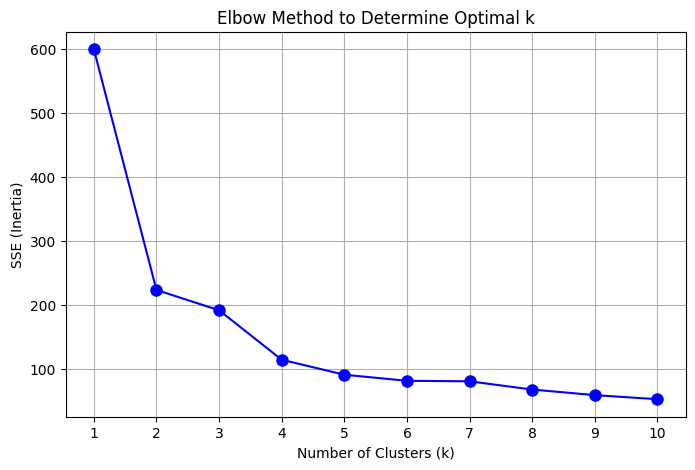

In [ ]:
import matplotlib.pyplot as plt

sse_list = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_X)
    sse_list.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse_list, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method to Determine Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()